<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Python do Zero**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Analisando sua Caixa de Emails

Todos os dias recebemos uma grande quantidade de e-mails que nos trazem variados tipos de informações em diversos formatos. Mas como organizar, entender e trabalhar com todos esses dados disponíveis?


<center><img width="50%" src="https://image.freepik.com/free-vector/mail-sent-concept-illustration_114360-168.jpg"></center>

Nessa aula, veremos como acessar, baixar e trabalhar com os dados que recebemos por e-mail.

## Coletando os Dados

Antes de começar, você vai precisar acessar sua conta do **Gmail**. Faça o login no mesmo navegador que você está utilizando agora, pois será necessário se conectar à sua conta.

Quando você estiver logado, clique [aqui](https://takeout.google.com/settings/takeout).

Na página do Google Takeout, ele te oferece diversas opções de dados de serviços Google a serem baixados. Entretanto, aqui estamos focados em e-mails, portanto, vamos **Desmarcar Tudo**.

<center><img width="50%" src="https://github.com/rafaelnduarte/sigmoidal_data/blob/master/Screen%20Shot%202020-09-16%20at%2011.09.01%20AM.png?raw=true"></center>

Assim, ele irá fazer o download apenas do que nós selecionarmos. Vamos selecionar **apenas o Gmail**, e seguir para o próximo passo, onde vamos configurar as opções de download.

<center><img width="50%" src="https://github.com/rafaelnduarte/sigmoidal_data/blob/master/Screen%20Shot%202020-09-16%20at%2011.09.17%20AM.png?raw=true"></center>

No próximo passo, vamos selecionar que o link de download seja enviado por e-mail, que os dados sejam exportados apenas uma vez,  vamos selecionar o formato `.zip`, e selecionar o tamanho do arquivo para 50GB.

<center><img width="50%" src="https://github.com/rafaelnduarte/sigmoidal_data/blob/master/Screen%20Shot%202020-09-16%20at%2011.19.50%20AM.png?raw=true"></center>

Atenção! Os dados podem demorar bastante para serem enviados, a depender do tamanho do arquivo que será gerado, caso sua caixa esteja muito cheia. É importante entender que o processo pode demorar. Mais dados nos ajudam a ter uma noção melhor do que está acontecendo, mas, caso prefira, é possível coletar um volume menor de dados.

O processo pode levar várias horas, e até mais de um dia. Tenha paciência, e assim que receber e baixar, dê seguimento ao projeto por aqui.

In [ ]:
# importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mailbox
import re
import pytz
import seaborn as sns

## Carregando os Dados
Após fazer o download do arquivo .zip, faça o upload do mesmo para o Colab através da aba de arquivos à esquerda do navegador. Uma vez lá, copie o caminho, e use esse endereço para carregar o arquivo como fizemos abaixo.

In [ ]:
!unzip /content/takeout-20200914T185247Z-001.zip

Archive:  /content/takeout-20200914T185247Z-001.zip
  inflating: Takeout/E-mail/Configurações do usuário/Filtros.json  
  inflating: Takeout/E-mail/Todos os e-mails, incluindo Spam e Lixeira.mbox  
  inflating: Takeout/navegador_arquivo.html  


Agora que fizemos o upload e descompactamos o arquivo, é hora de carregar os dados do nosso e-mail. Para isso, vamos utilizar a biblioteca `mailbox` para carregar o arquivo do tipo `mbox` contido no nosso arquivo zip.

In [ ]:
# carregando o arquivo
mbox = mailbox.mbox("/content/Takeout/E-mail/Todos os e-mails, incluindo Spam e Lixeira.mbox")

In [ ]:
# visualizando as chaves
mbox[0].keys()

['X-GM-THRID',
 'X-Gmail-Labels',
 'Delivered-To',
 'Received',
 'X-Google-Smtp-Source',
 'X-Received',
 'ARC-Seal',
 'ARC-Message-Signature',
 'ARC-Authentication-Results',
 'Return-Path',
 'Received',
 'Received-SPF',
 'Authentication-Results',
 'DKIM-Signature',
 'DKIM-Signature',
 'From',
 'Message-ID',
 'Subject',
 'MIME-Version',
 'Content-Type',
 'To',
 'Date',
 'X-LinkedIn-Class',
 'X-LinkedIn-Template',
 'X-LinkedIn-fbl',
 'X-LinkedIn-Id',
 'List-Unsubscribe',
 'Require-Recipient-Valid-Since']

## Criando o Data Frame
Para que possamos trabalhar melhor com esses dados, vamos extrair os mesmos, salvá-los em um dicionário e construir com ele um data frame.

Para isso, vamos criar um dicionário, onde as chaves são as informações que queremos puxar, e os valores serão as entradas de cada e-mail, para cada variável de interesse.

Criaremos um loop for, para percorrer nosso arqvuio mbox, e pra cada mensagem, pegar as informações e adicioná-las aoo nosso dicionário.

In [ ]:
# criando o dicionário
email_dict = {
    'date': [],
    'from': [],
    'to': [],
    'subject': [],
    'labels': []
}

# coletando os dados
for message in mbox:
    email_dict['date'].append(message['date'])
    email_dict['from'].append(message['from'])
    email_dict['to'].append(message['to'])
    email_dict['subject'].append(message['subject'])
    email_dict['labels'].append(message['X-Gmail-Labels'])

In [ ]:
# transformando em dataframe
df = pd.DataFrame(email_dict)

In [ ]:
# visualizando as primeiras entradas
df.head()

,date,from,to,subject,labels
0,"Thu, 10 Sep 2020 11:15:52 +0000 (UTC)",LinkedIn <invitations@linkedin.com>,Carlos Melo <carlos@sigmoidal.ai>,Mario gostaria de fazer parte da sua rede,"=?UTF-8?Q?Caixa_de_entrada,Aberto,Categoria:_a..."
1,"Wed, 09 Sep 2020 21:56:45 +0000","""Coursera"" <no-reply@m.mail.coursera.org>","""Carlos Melo"" <carlos@sigmoidal.ai>",=?utf-8?B?U2VwdGVtYmVyIDIwMjAgTmV3c2xldHRlciDi...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
2,"Sun, 13 Sep 2020 11:40:00 +0000 (UTC)","""Medium Daily Digest"" <noreply@medium.com>",carlos@sigmoidal.ai,The Housing Market is Heading for a Cliff | Ro...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
3,"Tue, 08 Sep 2020 11:30:54 -0400",Vimeo <no-reply@vimeo.com>,carlos@sigmoidal.ai,Rafael Duarte uploaded a video to your Vimeo a...,"=?UTF-8?Q?Lixeira,Categoria:_atualiza=C3=A7=C3..."
4,"Wed, 09 Sep 2020 02:23:56 +0000 (UTC)",RD Station <info@rdstation.com.br>,carlos@sigmoidal.ai,[Novo lead] Caique Filipini - http://sigmoidal.ai,"=?UTF-8?Q?Arquivada,Categoria:_atuali?=\r\n =?..."


In [ ]:
# verificando os tipos
df.dtypes

date       object
from       object
to         object
subject    object
labels     object
dtype: object

Ao verificar os tipos das variáveis, já conseguimos perceber que precisaremos trablhar a coluna `date`. Essa coluna nos traz informações de data, mas está em formato `object`, é uma string.

Portanto, vamos converter para o formato `datetime`. Entretanto, essa coluna nos trás informácões de Time Zones, e precisamos passar o parâmetro `utc=True`, para que a conversão possa ser feita corretamente.

In [ ]:
# convertendo date para datetime
df['date'] = pd.to_datetime(df['date'], utc=True)

In [ ]:
# verificando as primeiras entradas
df.head()

,date,from,to,subject,labels
0,2020-09-10 11:15:52+00:00,LinkedIn <invitations@linkedin.com>,Carlos Melo <carlos@sigmoidal.ai>,Mario gostaria de fazer parte da sua rede,"=?UTF-8?Q?Caixa_de_entrada,Aberto,Categoria:_a..."
1,2020-09-09 21:56:45+00:00,"""Coursera"" <no-reply@m.mail.coursera.org>","""Carlos Melo"" <carlos@sigmoidal.ai>",=?utf-8?B?U2VwdGVtYmVyIDIwMjAgTmV3c2xldHRlciDi...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
2,2020-09-13 11:40:00+00:00,"""Medium Daily Digest"" <noreply@medium.com>",carlos@sigmoidal.ai,The Housing Market is Heading for a Cliff | Ro...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
3,2020-09-08 15:30:54+00:00,Vimeo <no-reply@vimeo.com>,carlos@sigmoidal.ai,Rafael Duarte uploaded a video to your Vimeo a...,"=?UTF-8?Q?Lixeira,Categoria:_atualiza=C3=A7=C3..."
4,2020-09-09 02:23:56+00:00,RD Station <info@rdstation.com.br>,carlos@sigmoidal.ai,[Novo lead] Caique Filipini - http://sigmoidal.ai,"=?UTF-8?Q?Arquivada,Categoria:_atuali?=\r\n =?..."


Excelente! Já temos nossos dados no tipo que precisamos. Entretanto, ainda existe uma transformação que precisa ser feita. 

Precisamos que a informação de *time zone* esteja condizente com a Time Zone que nos encontramos. Para isso, aplicaremos uma função *lambda* para aplicar às entradas o método timezone da biblioteca `pytz` para que possamos ter a informação correta de *time zone*.

In [ ]:
# transformando time zone
df["date"] = df["date"].apply(lambda x: x.astimezone(pytz.timezone("America/Sao_Paulo")))

In [ ]:
# verificando o resultado
df.head()

,date,from,to,subject,labels
0,2020-09-10 08:15:52-03:00,LinkedIn <invitations@linkedin.com>,Carlos Melo <carlos@sigmoidal.ai>,Mario gostaria de fazer parte da sua rede,"=?UTF-8?Q?Caixa_de_entrada,Aberto,Categoria:_a..."
1,2020-09-09 18:56:45-03:00,"""Coursera"" <no-reply@m.mail.coursera.org>","""Carlos Melo"" <carlos@sigmoidal.ai>",=?utf-8?B?U2VwdGVtYmVyIDIwMjAgTmV3c2xldHRlciDi...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
2,2020-09-13 08:40:00-03:00,"""Medium Daily Digest"" <noreply@medium.com>",carlos@sigmoidal.ai,The Housing Market is Heading for a Cliff | Ro...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
3,2020-09-08 12:30:54-03:00,Vimeo <no-reply@vimeo.com>,carlos@sigmoidal.ai,Rafael Duarte uploaded a video to your Vimeo a...,"=?UTF-8?Q?Lixeira,Categoria:_atualiza=C3=A7=C3..."
4,2020-09-08 23:23:56-03:00,RD Station <info@rdstation.com.br>,carlos@sigmoidal.ai,[Novo lead] Caique Filipini - http://sigmoidal.ai,"=?UTF-8?Q?Arquivada,Categoria:_atuali?=\r\n =?..."


Com os dados nos formatos e tipos que precisamos, é hora de continuar a limpeza dos nossos dados.

Abaixo, ao verificamos a presença de dados ausentes. Como a quantidade é pequena, vamos excluir essas linhas.

In [ ]:
# verificando entradas vazias
df.isnull().sum()

date        0
from        0
to          8
subject    16
labels      0
dtype: int64

In [ ]:
# excluindo as linhas
df.dropna(how='any', inplace=True)

In [ ]:
# verificando novamente
df.isnull().sum()

date       0
from       0
to         0
subject    0
labels     0
dtype: int64

## Limpeza de Strings

Ao verificar os dados acima, conseguimos perceber que temos algumas entradas bastante confusas, onde o entendimento do que, de fato, é informação relevante fica comprometido.

<center><img width="50%" src="https://image.freepik.com/free-photo/housekeeping-concept-with-hand-holding-cloth_23-2147699396.jpg"></center>

Por isso, é importante que façamos uma limpeza dessas entradas, utilizando as técnicas de manipulação de strings que aprendemos nos módulos anteriores. 

A primeira coisa que vamos fazer é limpar os e-mails.

Para isso, vamos criar uma função para retirar tudo aquilo que não faz parte do endereço de e-mail, e aplicar a mesma nas colunas `to` e `from`.

In [ ]:
# criando a função
def extrair_email(string_email):
    email = re.findall(r'<(.+?)>', string_email)
    if email:
        return email[0]
    else:
        return string_email

In [ ]:
# aplicando a função
df['to'] = df['to'].apply(extrair_email)
df['from'] = df['from'].apply(extrair_email)

In [ ]:
# verificando os resultados
df.head()

,date,from,to,subject,labels
0,2020-09-10 08:15:52-03:00,invitations@linkedin.com,carlos@sigmoidal.ai,Mario gostaria de fazer parte da sua rede,"=?UTF-8?Q?Caixa_de_entrada,Aberto,Categoria:_a..."
1,2020-09-09 18:56:45-03:00,no-reply@m.mail.coursera.org,carlos@sigmoidal.ai,=?utf-8?B?U2VwdGVtYmVyIDIwMjAgTmV3c2xldHRlciDi...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
2,2020-09-13 08:40:00-03:00,noreply@medium.com,carlos@sigmoidal.ai,The Housing Market is Heading for a Cliff | Ro...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
3,2020-09-08 12:30:54-03:00,no-reply@vimeo.com,carlos@sigmoidal.ai,Rafael Duarte uploaded a video to your Vimeo a...,"=?UTF-8?Q?Lixeira,Categoria:_atualiza=C3=A7=C3..."
4,2020-09-08 23:23:56-03:00,info@rdstation.com.br,carlos@sigmoidal.ai,[Novo lead] Caique Filipini - http://sigmoidal.ai,"=?UTF-8?Q?Arquivada,Categoria:_atuali?=\r\n =?..."


Agora, iremos fazer um processo parecido para limpar a coluna `label`.

Criaremos uma função que retire as informações desnecessárias, divida os itens por vírgula, e retorne apenas o primeiro item, que é o item de interesse para nós.

In [ ]:
# criando a função
def extrair_label(string_labels):
    return string_labels.replace("=?UTF-8?Q?", "").split(",")[0]

In [ ]:
# aplicando a função
df["labels"] = df["labels"].apply(extrair_label)

In [ ]:
# verificando os resultados
df.head()

,date,from,to,subject,labels
0,2020-09-10 08:15:52-03:00,invitations@linkedin.com,carlos@sigmoidal.ai,Mario gostaria de fazer parte da sua rede,Caixa_de_entrada
1,2020-09-09 18:56:45-03:00,no-reply@m.mail.coursera.org,carlos@sigmoidal.ai,=?utf-8?B?U2VwdGVtYmVyIDIwMjAgTmV3c2xldHRlciDi...,Caixa_de_entrada
2,2020-09-13 08:40:00-03:00,noreply@medium.com,carlos@sigmoidal.ai,The Housing Market is Heading for a Cliff | Ro...,Caixa_de_entrada
3,2020-09-08 12:30:54-03:00,no-reply@vimeo.com,carlos@sigmoidal.ai,Rafael Duarte uploaded a video to your Vimeo a...,Lixeira
4,2020-09-08 23:23:56-03:00,info@rdstation.com.br,carlos@sigmoidal.ai,[Novo lead] Caique Filipini - http://sigmoidal.ai,Arquivada


## Análise Exploratória

Agora que nossos dados foram adquiridos, carregados e limpos, eles estão prontos para serem analisados!

<center><img width="50%" src="https://image.freepik.com/free-photo/business-presentation-laptop-screen_53876-13516.jpg"></center>

A parte que mais demanda nosso tempo e atenção é a Análise Exploratória, pois é aqui que vamos transformar dados em informação, encontrar isights que farão a diferença em nosso projetos.

A primeira análise que faremos será em relação aos endereços que nos enviam e-mail. Qual foi o endereço que mais me enviou e-mails?

In [ ]:
# verificando endereços que mais enviaram e-mail para minha caixa entrada
df[df["labels"] == "Caixa_de_entrada"]["from"].value_counts()[0:5]

info@rdstation.com.br            255
messages-noreply@linkedin.com    110
noreply@medium.com               108
invitations@linkedin.com          95
adrian@pyimagesearch.com          89
Name: from, dtype: int64

Outro insight interessante é descobrir que dia da semana a recebemos mais e-mail.

Usando Python e Pandas, vamos criar uma nova coluna, que indica em que dia da semana cada e-mail foi enviado.

In [ ]:
df.head()

,date,from,to,subject,labels
0,2020-09-10 08:15:52-03:00,invitations@linkedin.com,carlos@sigmoidal.ai,Mario gostaria de fazer parte da sua rede,Caixa_de_entrada
1,2020-09-09 18:56:45-03:00,no-reply@m.mail.coursera.org,carlos@sigmoidal.ai,=?utf-8?B?U2VwdGVtYmVyIDIwMjAgTmV3c2xldHRlciDi...,Caixa_de_entrada
2,2020-09-13 08:40:00-03:00,noreply@medium.com,carlos@sigmoidal.ai,The Housing Market is Heading for a Cliff | Ro...,Caixa_de_entrada
3,2020-09-08 12:30:54-03:00,no-reply@vimeo.com,carlos@sigmoidal.ai,Rafael Duarte uploaded a video to your Vimeo a...,Lixeira
4,2020-09-08 23:23:56-03:00,info@rdstation.com.br,carlos@sigmoidal.ai,[Novo lead] Caique Filipini - http://sigmoidal.ai,Arquivada


In [ ]:
# criando uma variávei de dia da semana
df["weekday"] = df["date"].dt.weekday

In [ ]:
# verificando o resultado
df.head()

,date,from,to,subject,labels,weekday
0,2020-09-10 08:15:52-03:00,invitations@linkedin.com,carlos@sigmoidal.ai,Mario gostaria de fazer parte da sua rede,Caixa_de_entrada,3
1,2020-09-09 18:56:45-03:00,no-reply@m.mail.coursera.org,carlos@sigmoidal.ai,=?utf-8?B?U2VwdGVtYmVyIDIwMjAgTmV3c2xldHRlciDi...,Caixa_de_entrada,2
2,2020-09-13 08:40:00-03:00,noreply@medium.com,carlos@sigmoidal.ai,The Housing Market is Heading for a Cliff | Ro...,Caixa_de_entrada,6
3,2020-09-08 12:30:54-03:00,no-reply@vimeo.com,carlos@sigmoidal.ai,Rafael Duarte uploaded a video to your Vimeo a...,Lixeira,1
4,2020-09-08 23:23:56-03:00,info@rdstation.com.br,carlos@sigmoidal.ai,[Novo lead] Caique Filipini - http://sigmoidal.ai,Arquivada,1


Com a coluna criada, vamos transformar esses números em uma informação mais fácil de digerir e interpretar.

A transformação que fizemos retorna Segunda-Feira como o primeiro dia, portanto, o dia associado ao valor `0`, é Segunda-Feira, e assim sucessivamente.

Vamos criar um dicionário, onde associaremos para as chaves, valores em formato de string para os dias da semana, e transformar nossa coluna com esse dicionário.

In [ ]:
# criando dicionário
dias_semana = {0:"Segunda", 1:"Terça", 2:"Quarta",3:"Quinta", 4:"Sexta", 5:"Sábado", 6:"Domingo"}

# transformando a coluna
df["weekday"] = df["weekday"].replace(dias_semana)

In [ ]:
# verificando o resultado
df.head()

,date,from,to,subject,labels,weekday
0,2020-09-10 08:15:52-03:00,invitations@linkedin.com,carlos@sigmoidal.ai,Mario gostaria de fazer parte da sua rede,Caixa_de_entrada,Quinta
1,2020-09-09 18:56:45-03:00,no-reply@m.mail.coursera.org,carlos@sigmoidal.ai,=?utf-8?B?U2VwdGVtYmVyIDIwMjAgTmV3c2xldHRlciDi...,Caixa_de_entrada,Quarta
2,2020-09-13 08:40:00-03:00,noreply@medium.com,carlos@sigmoidal.ai,The Housing Market is Heading for a Cliff | Ro...,Caixa_de_entrada,Domingo
3,2020-09-08 12:30:54-03:00,no-reply@vimeo.com,carlos@sigmoidal.ai,Rafael Duarte uploaded a video to your Vimeo a...,Lixeira,Terça
4,2020-09-08 23:23:56-03:00,info@rdstation.com.br,carlos@sigmoidal.ai,[Novo lead] Caique Filipini - http://sigmoidal.ai,Arquivada,Terça


Agora que temos todas as informações necessárias, podemos usar a biblioteca `seaborn` para plotar um `countplot` e nos mostrar em qual dia da semana recebemos mais e-mails.

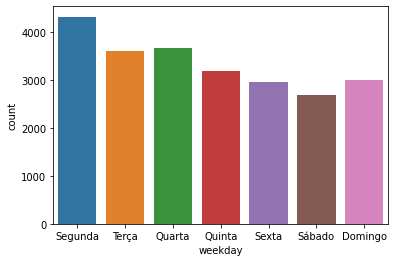

In [ ]:
# plotando o countplot
sns.countplot(df["weekday"], order=["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"]);

Agora já sabemos que a **Segunda-Feira** traz um volume maior de e-mails do que qualquer outro dia da semana. Mas qual será o horário que mais recebemos e-mails?

Podemos fazer um processo parecido com o que fizemos de dias da semana para criar uma variável que nos indica a hora em que o e-mail foi recebido.

Assim, conseguimos fazer uma análise sememlhante à que fizemos sobre os dias.

In [ ]:
# coletando as horas
df["hora"] = df["date"].dt.hour

In [ ]:
# verificando o resultado
df.head()

,date,from,to,subject,labels,weekday,hora
0,2020-09-10 08:15:52-03:00,invitations@linkedin.com,carlos@sigmoidal.ai,Mario gostaria de fazer parte da sua rede,Caixa_de_entrada,Quinta,8
1,2020-09-09 18:56:45-03:00,no-reply@m.mail.coursera.org,carlos@sigmoidal.ai,=?utf-8?B?U2VwdGVtYmVyIDIwMjAgTmV3c2xldHRlciDi...,Caixa_de_entrada,Quarta,18
2,2020-09-13 08:40:00-03:00,noreply@medium.com,carlos@sigmoidal.ai,The Housing Market is Heading for a Cliff | Ro...,Caixa_de_entrada,Domingo,8
3,2020-09-08 12:30:54-03:00,no-reply@vimeo.com,carlos@sigmoidal.ai,Rafael Duarte uploaded a video to your Vimeo a...,Lixeira,Terça,12
4,2020-09-08 23:23:56-03:00,info@rdstation.com.br,carlos@sigmoidal.ai,[Novo lead] Caique Filipini - http://sigmoidal.ai,Arquivada,Terça,23


Pronto! Agora basta plotar um countplot, como fizemos anteriormente.

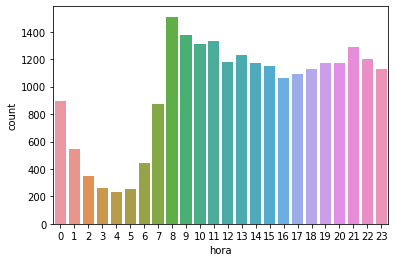

In [ ]:
# plotando o gráfico
sns.countplot(df["hora"]);

**One more thing... exportando para Excel!**



In [ ]:
# converter para formato de data que o Excel aceita
df['date'] = df['date'].apply(lambda a: pd.to_datetime(a).date()) 

In [ ]:
df.to_excel("meu_gmail.xlsx", index=False)

## [EXTRA] Word Clouds
<center><img width="50%" src="https://sigmoidal.ai/wp-content/uploads/2019/10/wordcloud_python-2-1024x576-min-1024x576.png"></center>

Aqui, vamos mostrar uma outra possibilidade que trabalhar com palavras nos proporciona. É possível criar `Word Clouds`, ou nuvens de palavras, em tradução livre.

Esse tipo de visualização nos ajuda a entender melhor um conjunto de palavras, e pode ser uma poderosa ferramenta de visualização.

A intenção nesse notebook não é de fazer um tutorial completo sobre wordclouds, e sim apenas mostrar o potencial desse tipo de visualização, e incentivar você a ir além, pensar fora da caixa, e buscar formas diferentes de analisar e apresentar suas análises.

Caso você queira um tutorial completo sobre o que são, como funciona e como implementar word clouds, no Sigmoidal já fizemos um artigo com vídeo mostrando tudo! Basta clicar [aqui](https://sigmoidal.ai/como-criar-uma-wordcloud-em-python/) para acessar.



In [ ]:
# importando os pacotes
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

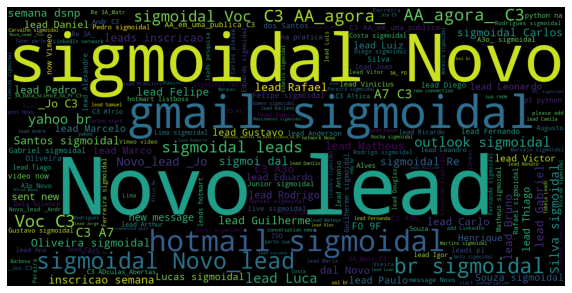

In [ ]:
# criando a wordcloud
summary = df['subject']

all_summary = " ".join(s for s in summary)
 
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "ai", "UTF", "_http", "hotmail", "gmail"])
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);

Aqui, o intuito foi apenas mostrar a possibilidade. Existem muitas coisas que podem ser melhoradas, tratamento mais fino de stopwords, uso de máscaras, muitas possibilidades.

Se você ficou interessado, não deixe de acessar o [tutorial completo](https://sigmoidal.ai/como-criar-uma-wordcloud-em-python/).